# Project 4 - web scraping

Riley Galante

The aim of this project is to utilize some of the web scaping and html tools python supports in order to gather updated information from the web. In this case, PGA tour statistics are updated on the pgatour.com website after each tournament, which we can scrape and condense into one big dataframe in order to make predictions off the data. I hope to be able to learn which areas of the golf game specifically contribute the most to high world golf ranking, and be able to predict using that data rankings based off golfer statistics.

In [228]:
#import basics first, we will need requests and bs4 to get the html from each page
#and beautiful soup to help isolate the html we will pull the data from
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [229]:
#an example of how the html is scraped from the web then condensed into a pandas dataframe

#get the URL from the PGA tour website
#this URL in particular pertains to the page that contains the table of strokes
#gained off the tee data
URL_SGOT = "https://www.pgatour.com/stats/stat.02567.html"
#use requests to get the html from the specified page on the website
page = requests.get(URL_SGOT)
#create a beautiful soup object which will contain the page html 
soup = BeautifulSoup(page.text, "html.parser")

In [230]:
#after inspecting the website, the table we want has the id "statsTable"
#we use beautiful soup to isolate this html so it can be read by pandas
tablestats = soup.find(id="statsTable")

#read_html will return a list containing the DataFrame, which we then access and
#store into sg_offtee
sg_offtee = pd.read_html(str(tablestats))[0]
#proof of concept
print(sg_offtee.shape)
sg_offtee.head(10)

(209, 7)


,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVERAGE,TOTAL SG:OTT,MEASURED ROUNDS
0,1,1,Jon Rahm,42,1.311,40.634,31
1,2,2,Keith Mitchell,51,0.815,30.961,38
2,3,3,Cameron Young,49,0.812,32.487,40
3,4,4,Sergio Garcia,31,0.793,14.271,18
4,5,5,Brendan Steele,49,0.752,25.584,34
5,6,6,Corey Conners,54,0.671,26.188,39
6,T7,19,Cameron Champ,32,0.652,14.994,23
7,T7,7,Collin Morikawa,38,0.652,14.339,22
8,9,8,Will Zalatoris,49,0.631,17.039,27
9,10,9,Luke List,51,0.618,22.253,36


In [231]:
#remaining urls to go through

#in order: strokes gained tee to green,
#driving accuracy percentage,
#strokes gained approach the green,
#birdie or better percentage from fairway,
#birdie or better percentage from rough, 
#proximity to hole (on approach),
#strokes gained around the green,
#green in regulation (GIR) percentage,
#scrambling,
#strokes gained putting,
#putts per round,
#strokes gained total,
#scoring average,
#top 10 finishes + num of 1st, 2nd, 3rd place finishes,
#official world golf ranking

list_of_urls = ["https://www.pgatour.com/stats/stat.02674.html",
"https://www.pgatour.com/stats/stat.102.html",
"https://www.pgatour.com/stats/stat.02568.html",
"https://www.pgatour.com/stats/stat.02333.html",
"https://www.pgatour.com/stats/stat.02336.html",
"https://www.pgatour.com/stats/stat.331.html",
"https://www.pgatour.com/stats/stat.02569.html",
"https://www.pgatour.com/stats/stat.103.html",
"https://www.pgatour.com/stats/stat.130.html",
"https://www.pgatour.com/stats/stat.02564.html",
"https://www.pgatour.com/stats/stat.119.html",
"https://www.pgatour.com/stats/stat.02675.html",
"https://www.pgatour.com/stats/stat.120.html",
"https://www.pgatour.com/stats/stat.138.html",
"https://www.pgatour.com/stats/stat.186.html"]

dataframes = [sg_offtee]

for url in list_of_urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")
    tablestats = soup.find(id="statsTable")
    new_df = pd.read_html(str(tablestats))[0]
    dataframes.append(new_df)

In [232]:
#now need to join all tables together by player name so that each row, corresponding to a player,
#can represent a complete statistical summary for that player

ranking_df = dataframes[-1]

#only relevant data is player name and their current world ranking from the 
#official world golf ranking table
pga_stats = pd.DataFrame(ranking_df[ranking_df.columns[[2, 0]]])
pga_stats.head(10)

,PLAYER NAME,RANK THIS WEEK
0,Scottie Scheffler,1
1,Jon Rahm,2
2,Collin Morikawa,3
3,Patrick Cantlay,4
4,Cameron Smith,5
5,Viktor Hovland,6
6,Rory McIlroy,7
7,Justin Thomas,8
8,Jordan Spieth,9
9,Dustin Johnson,10


In [233]:
#example of join

#stats will be merged on the player name, so each feature will represent a statistic for that player
#only selecting player name and the average strokes gained off the tee, since the rest of the info
#is mostly repetitive or not relevant
pga_stats_temp = pga_stats.merge(sg_offtee[sg_offtee.columns[[2,4]]], how='outer', on="PLAYER NAME")
pga_stats_temp.columns = ["PLAYER NAME", "rank", "sg_ott"]
pga_stats_temp.head(20)

,PLAYER NAME,rank,sg_ott
0,Scottie Scheffler,1.0,0.141
1,Jon Rahm,2.0,1.311
2,Collin Morikawa,3.0,0.652
3,Patrick Cantlay,4.0,0.519
4,Cameron Smith,5.0,-0.161
5,Viktor Hovland,6.0,0.588
6,Rory McIlroy,7.0,NaN
7,Justin Thomas,8.0,0.476
8,Jordan Spieth,9.0,0.384
9,Dustin Johnson,10.0,0.465


In [234]:
#sg tee to green
#this table conatins average sg tee to green, sg off the tee, sg approach the green, and sg around the green,
#since sg tee to green encompasses all shots except those on the green
#strokes gained off the tee has already been added, but we can add sg approach the green
#and sg around the green instead of pulling that data from their respective tables
pga_stats_temp = pga_stats_temp.merge(dataframes[1][dataframes[1].columns[[2,4,6,7]]], how='outer', on='PLAYER NAME')
pga_stats_temp.head(20)

,PLAYER NAME,rank,sg_ott,AVERAGE,SG:APR,SG:ARG
0,Scottie Scheffler,1.0,0.141,0.944,0.495,0.308
1,Jon Rahm,2.0,1.311,1.808,0.656,-0.159
2,Collin Morikawa,3.0,0.652,1.114,0.821,-0.360
3,Patrick Cantlay,4.0,0.519,1.116,0.249,0.348
4,Cameron Smith,5.0,-0.161,0.971,0.880,0.251
5,Viktor Hovland,6.0,0.588,0.770,1.019,-0.838
6,Rory McIlroy,7.0,NaN,NaN,NaN,NaN
7,Justin Thomas,8.0,0.476,1.648,0.935,0.236
8,Jordan Spieth,9.0,0.384,1.050,0.443,0.222
9,Dustin Johnson,10.0,0.465,0.637,0.349,-0.177


In [235]:
#rename columns to correct labels
pga_stats_temp = pga_stats_temp.rename(columns={'AVERAGE':'sg_ttg', 'SG:APR':'sg_apr', 'SG:ARG':'sg_arg'})

In [236]:
#driving accuracy percentage
pga_stats_temp = pga_stats_temp.merge(dataframes[2][dataframes[2].columns[[2,4]]], how='outer', on='PLAYER NAME')
#other table data has % as a column name, so update before those columns are merged
pga_stats_temp = pga_stats_temp.rename(columns={'%':'driving_accuracy'})

#birdie or better percentage from fairway,
pga_stats_temp = pga_stats_temp.merge(dataframes[4][dataframes[4].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'%':'birdie_or_better_fairway'})

#birdie or better percentage from rough, 
pga_stats_temp = pga_stats_temp.merge(dataframes[5][dataframes[5].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'%':'birdie_or_better_rough'})

#proximity to hole (on approach),
pga_stats_temp = pga_stats_temp.merge(dataframes[6][dataframes[6].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'AVG':'proximity_approach'})

#green in regulation (GIR) percentage,
pga_stats_temp = pga_stats_temp.merge(dataframes[8][dataframes[8].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'%':'gir_percentage'})

#scrambling,
pga_stats_temp = pga_stats_temp.merge(dataframes[9][dataframes[9].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'%':'scrambling_percentage'})

#strokes gained putting,
pga_stats_temp = pga_stats_temp.merge(dataframes[10][dataframes[10].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'AVERAGE':'sg_putting'})

#putts per round,
pga_stats_temp = pga_stats_temp.merge(dataframes[11][dataframes[11].columns[[2,4]]], how='outer', on='PLAYER NAME')
pga_stats_temp = pga_stats_temp.rename(columns={'AVG':'putts_p_round'})

#strokes gained total,
pga_stats_temp = pga_stats_temp.merge(dataframes[12][dataframes[12].columns[[2,4]]], how='outer', on='PLAYER NAME')

#scoring average,
pga_stats_temp = pga_stats_temp.merge(dataframes[13][dataframes[13].columns[[2,4]]], how='outer', on='PLAYER NAME')

#top 10 finishes + num of 1st, 2nd, 3rd place finishes
pga_stats_temp = pga_stats_temp.merge(dataframes[14][dataframes[14].columns[[2,3,4,5,6]]], how='outer', on='PLAYER NAME')

pga_stats_temp = pga_stats_temp.rename(columns={'AVG':'scoring_avg', 'AVERAGE':'sg_total',
    'TOP 10':'top_10_finishes', '1ST':'1st_place_finishes', '2ND':'2nd_place_finishes',
    '3RD':'3rd_place_finishes'})

pga_stats_temp.head(20)

,PLAYER NAME,rank,sg_ott,sg_ttg,sg_apr,sg_arg,driving_accuracy,birdie_or_better_fairway,birdie_or_better_rough,proximity_approach,gir_percentage,scrambling_percentage,sg_putting,putts_p_round,sg_total,scoring_avg,top_10_finishes,1st_place_finishes,2nd_place_finishes,3rd_place_finishes
0,Scottie Scheffler,1.0,0.141,0.944,0.495,0.308,58.91,28.99,22.31,"37' 6""",71.26,59.24,0.588,28.43,1.532,69.676,7.0,4.0,1.0,NaN
1,Jon Rahm,2.0,1.311,1.808,0.656,-0.159,64.85,26.83,18.63,"35' 6""",73.83,59.22,0.014,29.68,1.822,70.068,5.0,1.0,1.0,1.0
2,Collin Morikawa,3.0,0.652,1.114,0.821,-0.360,68.03,30.69,21.31,"33' 8""",71.30,61.29,0.218,28.30,1.332,69.878,6.0,NaN,2.0,NaN
3,Patrick Cantlay,4.0,0.519,1.116,0.249,0.348,62.88,30.43,19.18,"37' 11""",68.52,67.06,0.449,28.20,1.566,69.988,6.0,1.0,2.0,NaN
4,Cameron Smith,5.0,-0.161,0.971,0.880,0.251,56.70,34.25,21.10,"36' 1""",71.01,62.28,0.922,27.81,1.892,69.338,5.0,2.0,NaN,1.0
5,Viktor Hovland,6.0,0.588,0.770,1.019,-0.838,65.23,29.19,20.21,"35' 0""",70.03,62.44,0.282,28.71,1.052,70.311,4.0,1.0,1.0,NaN
6,Rory McIlroy,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN
7,Justin Thomas,8.0,0.476,1.648,0.935,0.236,56.25,31.59,17.59,"34' 5""",69.03,68.16,0.043,27.58,1.691,69.688,6.0,NaN,NaN,2.0
8,Jordan Spieth,9.0,0.384,1.050,0.443,0.222,58.04,24.86,19.19,"36' 2""",69.61,66.67,-0.430,29.06,0.619,71.179,2.0,1.0,1.0,NaN
9,Dustin Johnson,10.0,0.465,0.637,0.349,-0.177,56.63,25.94,29.69,"33' 10""",64.35,63.64,0.078,28.04,0.715,70.857,2.0,NaN,NaN,NaN


In [237]:
#all the data is now merged
pga_stats_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1000
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER NAME               1001 non-null   object 
 1   rank                      998 non-null    float64
 2   sg_ott                    209 non-null    float64
 3   sg_ttg                    209 non-null    float64
 4   sg_apr                    209 non-null    float64
 5   sg_arg                    209 non-null    float64
 6   driving_accuracy          209 non-null    float64
 7   birdie_or_better_fairway  209 non-null    float64
 8   birdie_or_better_rough    209 non-null    float64
 9   proximity_approach        209 non-null    object 
 10  gir_percentage            209 non-null    float64
 11  scrambling_percentage     209 non-null    float64
 12  sg_putting                209 non-null    float64
 13  putts_p_round             209 non-null    float64
 14  sg_total

In [238]:
#now the null values need to be replaced
stats_imputed = pga_stats_temp.copy()

#there are a good number of players that don't have any stats recorded and haven't placed well in events
#its better to delete them from the table than impute the minimum value(worst score), so the majority
#of the data isn't skewed towards the bad end
#the primary goal is to analyze what makes the better players good
rows_to_drop = []

for row in range(len(stats_imputed.index)):
    #only having 2 not null features means there isn't any stats recorded for that player
    if stats_imputed.iloc[row].notnull().sum() == 2:
        rows_to_drop.append(row)

stats_imputed.drop(stats_imputed.index[rows_to_drop], inplace=True)

#the remaining players, they have at least one feature filled outside of their name and rank

#for the placement features (top 10, 1st, 2nd, 3rd), NaN represent 0s
stats_imputed['top_10_finishes'].fillna(0, inplace=True)
stats_imputed['1st_place_finishes'].fillna(0, inplace=True)
stats_imputed['2nd_place_finishes'].fillna(0, inplace=True)
stats_imputed['3rd_place_finishes'].fillna(0, inplace=True)

#for most of the other null values, it means the player most likely didn't play in enough tournaments
#this year to get a value, or their stats in that category were so poor they didn't make the list
#the best imputation strategy here now is to fill those NaN with the minimum value (worst score) 
#in each category
#for some categories, worst score will be the maximum value (i.e. scoring average, putts per round)
#proximity approach will be untouched because it needs to be transformed into numerical values

excluded_columns = ['PLAYER NAME', 'rank', 'top_10_finishes', '1st_place_finishes', '2nd_place_finishes',
'3rd_place_finishes', 'proximity_approach', 'putts_p_round', 'scoring_avg']
columns_min = [x for x in pga_stats_temp.columns if x not in excluded_columns]

for feature in columns_min:
    stats_imputed[feature].fillna(pga_stats_temp[feature].min(), inplace=True)

stats_imputed['putts_p_round'].fillna(pga_stats_temp['putts_p_round'].max(), inplace=True)
stats_imputed['scoring_avg'].fillna(pga_stats_temp['scoring_avg'].max(), inplace=True)

print(stats_imputed.info())
stats_imputed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 1000
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER NAME               224 non-null    object 
 1   rank                      221 non-null    float64
 2   sg_ott                    224 non-null    float64
 3   sg_ttg                    224 non-null    float64
 4   sg_apr                    224 non-null    float64
 5   sg_arg                    224 non-null    float64
 6   driving_accuracy          224 non-null    float64
 7   birdie_or_better_fairway  224 non-null    float64
 8   birdie_or_better_rough    224 non-null    float64
 9   proximity_approach        209 non-null    object 
 10  gir_percentage            224 non-null    float64
 11  scrambling_percentage     224 non-null    float64
 12  sg_putting                224 non-null    float64
 13  putts_p_round             224 non-null    float64
 14  sg_total 

,PLAYER NAME,rank,sg_ott,sg_ttg,sg_apr,sg_arg,driving_accuracy,birdie_or_better_fairway,birdie_or_better_rough,proximity_approach,gir_percentage,scrambling_percentage,sg_putting,putts_p_round,sg_total,scoring_avg,top_10_finishes,1st_place_finishes,2nd_place_finishes,3rd_place_finishes
0,Scottie Scheffler,1.0,0.141,0.944,0.495,0.308,58.91,28.99,22.31,"37' 6""",71.26,59.24,0.588,28.43,1.532,69.676,7.0,4.0,1.0,0.0
1,Jon Rahm,2.0,1.311,1.808,0.656,-0.159,64.85,26.83,18.63,"35' 6""",73.83,59.22,0.014,29.68,1.822,70.068,5.0,1.0,1.0,1.0
2,Collin Morikawa,3.0,0.652,1.114,0.821,-0.360,68.03,30.69,21.31,"33' 8""",71.30,61.29,0.218,28.30,1.332,69.878,6.0,0.0,2.0,0.0
3,Patrick Cantlay,4.0,0.519,1.116,0.249,0.348,62.88,30.43,19.18,"37' 11""",68.52,67.06,0.449,28.20,1.566,69.988,6.0,1.0,2.0,0.0
4,Cameron Smith,5.0,-0.161,0.971,0.880,0.251,56.70,34.25,21.10,"36' 1""",71.01,62.28,0.922,27.81,1.892,69.338,5.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,Christopher Gotterup,987.0,-1.272,-2.146,-1.578,-0.838,46.11,15.75,5.19,NaN,55.35,48.12,-1.138,30.40,-2.261,73.920,1.0,0.0,0.0,0.0
987,Mark Hensby,987.0,-1.272,-2.146,-1.578,-0.838,46.11,15.75,5.19,NaN,55.35,48.12,-1.138,30.40,-2.261,73.920,1.0,0.0,0.0,0.0
998,William McGirt,NaN,-0.333,-0.145,-0.290,0.478,63.33,16.21,19.77,"36' 7""",66.87,64.67,-0.220,29.18,-0.364,71.291,0.0,0.0,0.0,0.0
999,Jonas Blixt,NaN,-0.355,-2.146,-1.578,-0.213,56.03,18.03,12.00,"41' 4""",55.35,56.22,-0.044,28.00,-2.189,73.920,0.0,0.0,0.0,0.0


In [239]:
#need to remove last 3 rows since we don't know what rank those players are
stats_imputed.drop(stats_imputed.index[[-1, -2, -3]], inplace=True)

In [240]:
#transform proximity approach to inches as numerical feature
transformed=stats_imputed.copy()

transformed_vals = []

for index, val in enumerate(transformed['proximity_approach']):
    try:
        str_val = str(val)
        dist = str_val.split("' ")
        feet = float(dist[0])
        inches = float(dist[1].replace('"', ''))
        transformed_vals.append(12*feet + inches)
    except:
        #means val is NaN, leave for now
        transformed_vals.append(np.nan)

del transformed['proximity_approach']
prox_apr_transformed = pd.Series(transformed_vals)
transformed['proximity_approach'] = prox_apr_transformed

#now replace NaN with worst value (max because farther away from hole is worse)
transformed['proximity_approach'].fillna(transformed['proximity_approach'].max(), inplace=True)
transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 987
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER NAME               221 non-null    object 
 1   rank                      221 non-null    float64
 2   sg_ott                    221 non-null    float64
 3   sg_ttg                    221 non-null    float64
 4   sg_apr                    221 non-null    float64
 5   sg_arg                    221 non-null    float64
 6   driving_accuracy          221 non-null    float64
 7   birdie_or_better_fairway  221 non-null    float64
 8   birdie_or_better_rough    221 non-null    float64
 9   gir_percentage            221 non-null    float64
 10  scrambling_percentage     221 non-null    float64
 11  sg_putting                221 non-null    float64
 12  putts_p_round             221 non-null    float64
 13  sg_total                  221 non-null    float64
 14  scoring_av

In [241]:
transformed = transformed.rename(columns={'PLAYER NAME':'player'})

target = transformed['rank']
train = transformed.drop(columns=['player', 'rank'])

In [242]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
train_norm = norm.fit_transform(train, target)
train_norm = pd.DataFrame(train_norm, columns=train.columns)

<AxesSubplot:>

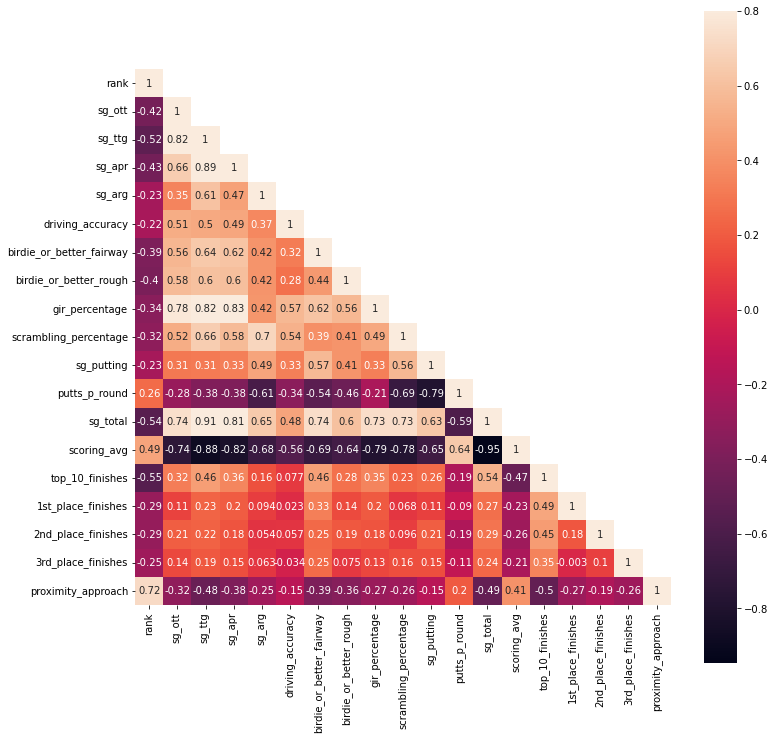

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

#use correlation matrix and put into heatmap
corrMatt = transformed.drop(columns=['player']).corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True,annot_kws={'size':10},ax=ax)

Interestingly enough, proximity to the hole, scoring average, and putts per round are more correlated to rank. That said, just because you might be gaining strokes on the field with higher sg putting, apr, ott, etc, that doesn't gaurantee a high golf ranking.

In [244]:
#train model, KNN and Random Forest are good classifiers for this problem

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(weights='distance')
model.fit(train_norm, target)
model.score(train_norm, target)

0.9864253393665159

In [245]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(train_norm, target)
model2.score(train_norm, target)

0.9864253393665159

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier()
model3.fit(train_norm, target)
model3.score(train_norm, target)

0.9864253393665159

In [247]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier()
model4.fit(train_norm, target)
model4.score(train_norm, target)

0.9864253393665159

Both classifiers did well here because of overfitting. There is only 1 observation per class, so testing on the same set it trained on will do very well. I want to try and see if the model can perform well against data from 2019.

In [248]:
#function that will accepts URLs corresponding to golfer data from another year
#output will be a prepared dataset
#URLs will need to be in the order set above

#once again, order of links is as follows
#strokes gained off the tee,
#strokes gained tee to green,
#driving accuracy percentage,
#strokes gained approach the green,
#birdie or better percentage from fairway,
#birdie or better percentage from rough, 
#proximity to hole (on approach),
#strokes gained around the green,
#green in regulation (GIR) percentage,
#scrambling,
#strokes gained putting,
#putts per round,
#strokes gained total,
#scoring average,
#top 10 finishes + num of 1st, 2nd, 3rd place finishes,
#official world golf ranking

def scrape_and_process(urls):
    print("Scraping and reading html...")
    dataframes = []
    for url in urls:
        try: 
            page = requests.get(url)
            soup = BeautifulSoup(page.text, "html.parser")
            tablestats = soup.find(id="statsTable")
            new_df = pd.read_html(str(tablestats))[0]
            dataframes.append(new_df)
        except:
            KeyboardInterrupt("Something went wrong with reading the URLs")

    print("Creating dataframe...")      
    ranking_df = dataframes[-1]
    pga_stats = pd.DataFrame(ranking_df[ranking_df.columns[[2, 0]]])

    print("Merging data...")
    #sg off the tee
    pga_stats_temp = pga_stats.merge(dataframes[0][dataframes[0].columns[[2,4]]], how='outer', on="PLAYER NAME")
    pga_stats_temp.columns = ["PLAYER NAME", "rank", "sg_ott"]
    
    #sg tee to green, sg approach the green, sg around the green
    pga_stats_temp = pga_stats_temp.merge(dataframes[1][dataframes[1].columns[[2,4,6,7]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'AVERAGE':'sg_ttg', 'SG:APR':'sg_apr', 'SG:ARG':'sg_arg'})

    #driving accuracy percentage
    pga_stats_temp = pga_stats_temp.merge(dataframes[2][dataframes[2].columns[[2,4]]], how='outer', on='PLAYER NAME')
    #other table data has % as a column name, so update before those columns are merged
    pga_stats_temp = pga_stats_temp.rename(columns={'%':'driving_accuracy'})

    #birdie or better percentage from fairway,
    pga_stats_temp = pga_stats_temp.merge(dataframes[4][dataframes[4].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'%':'birdie_or_better_fairway'})

    #birdie or better percentage from rough, 
    pga_stats_temp = pga_stats_temp.merge(dataframes[5][dataframes[5].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'%':'birdie_or_better_rough'})

    #proximity to hole (on approach),
    pga_stats_temp = pga_stats_temp.merge(dataframes[6][dataframes[6].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'AVG':'proximity_approach'})

    #green in regulation (GIR) percentage,
    pga_stats_temp = pga_stats_temp.merge(dataframes[8][dataframes[8].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'%':'gir_percentage'})

    #scrambling,
    pga_stats_temp = pga_stats_temp.merge(dataframes[9][dataframes[9].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'%':'scrambling_percentage'})

    #strokes gained putting,
    pga_stats_temp = pga_stats_temp.merge(dataframes[10][dataframes[10].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'AVERAGE':'sg_putting'})

    #putts per round,
    pga_stats_temp = pga_stats_temp.merge(dataframes[11][dataframes[11].columns[[2,4]]], how='outer', on='PLAYER NAME')
    pga_stats_temp = pga_stats_temp.rename(columns={'AVG':'putts_p_round'})

    #strokes gained total,
    pga_stats_temp = pga_stats_temp.merge(dataframes[12][dataframes[12].columns[[2,4]]], how='outer', on='PLAYER NAME')

    #scoring average,
    pga_stats_temp = pga_stats_temp.merge(dataframes[13][dataframes[13].columns[[2,4]]], how='outer', on='PLAYER NAME')

    #top 10 finishes + num of 1st, 2nd, 3rd place finishes
    pga_stats_temp = pga_stats_temp.merge(dataframes[14][dataframes[14].columns[[2,3,4,5,6]]], how='outer', on='PLAYER NAME')

    pga_stats_temp = pga_stats_temp.rename(columns={'AVG':'scoring_avg', 'AVERAGE':'sg_total',
        'TOP 10':'top_10_finishes', '1ST':'1st_place_finishes', '2ND':'2nd_place_finishes',
        '3RD':'3rd_place_finishes'})

    print("Cleaning and imputing...")
    stats_imputed = pga_stats_temp.copy()

    #another way to drop excess NaN rows
    #removes players that have 2 or less not null features, meaning they don't have
    #any stats recorded
    stats_imputed.dropna(thresh=3, inplace=True)
    #removes players that don't have a rank
    stats_imputed.dropna(subset=['rank'], inplace=True)

    #for the placement features (top 10, 1st, 2nd, 3rd), NaN represent 0s
    stats_imputed['top_10_finishes'].fillna(0, inplace=True)
    stats_imputed['1st_place_finishes'].fillna(0, inplace=True)
    stats_imputed['2nd_place_finishes'].fillna(0, inplace=True)
    stats_imputed['3rd_place_finishes'].fillna(0, inplace=True)

    excluded_columns = ['PLAYER NAME', 'rank', 'top_10_finishes', '1st_place_finishes', '2nd_place_finishes',
    '3rd_place_finishes', 'proximity_approach', 'putts_p_round', 'scoring_avg']
    columns_min = [x for x in pga_stats_temp.columns if x not in excluded_columns]

    for feature in columns_min:
        stats_imputed[feature].fillna(pga_stats_temp[feature].min(), inplace=True)

    stats_imputed['putts_p_round'].fillna(pga_stats_temp['putts_p_round'].max(), inplace=True)
    stats_imputed['scoring_avg'].fillna(pga_stats_temp['scoring_avg'].max(), inplace=True)

    #transform proximity approach to inches as numerical feature
    transformed=stats_imputed.copy()

    transformed_vals = []

    for val in transformed['proximity_approach']:
        try:
            str_val = str(val)
            dist = str_val.split("' ")
            feet = float(dist[0])
            inches = float(dist[1].replace('"', ''))
            transformed_vals.append(12*feet + inches)
        except:
            #means val is NaN, leave for now
            transformed_vals.append(np.nan)

    del transformed['proximity_approach']
    prox_apr_transformed = pd.Series(transformed_vals)
    transformed['proximity_approach'] = prox_apr_transformed

    #now replace NaN with worst value (max because farther away from hole is worse)
    transformed['proximity_approach'].fillna(transformed['proximity_approach'].max(), inplace=True)

    transformed = transformed.rename(columns={'PLAYER NAME':'player'})

    target = transformed['rank']
    train = transformed.drop(columns=['player', 'rank'])

    norm = Normalizer()
    train_norm = norm.fit_transform(train, target)
    train_norm = pd.DataFrame(train_norm, columns=train.columns)

    print("Done")

    return train_norm, target

    

In [249]:
urls_2019 = ["https://www.pgatour.com/stats/stat.02567.y2019.html",
"https://www.pgatour.com/stats/stat.02674.y2019.html",
"https://www.pgatour.com/stats/stat.102.y2019.html",
"https://www.pgatour.com/stats/stat.02568.y2019.html",
"https://www.pgatour.com/stats/stat.02333.y2019.html",
"https://www.pgatour.com/stats/stat.02336.y2019.html",
"https://www.pgatour.com/stats/stat.331.y2019.html",
"https://www.pgatour.com/stats/stat.02569.y2019.html",
"https://www.pgatour.com/stats/stat.103.y2019.html",
"https://www.pgatour.com/stats/stat.130.y2019.html",
"https://www.pgatour.com/stats/stat.02564.y2019.html",
"https://www.pgatour.com/stats/stat.119.y2019.html",
"https://www.pgatour.com/stats/stat.02675.y2019.html",
"https://www.pgatour.com/stats/stat.120.y2019.html",
"https://www.pgatour.com/stats/stat.138.y2019.html",
"https://www.pgatour.com/stats/stat.186.y2019.html"]

test_train, test_target = scrape_and_process(urls_2019)



Scraping and reading html...
Creating dataframe...
Merging data...
Cleaning and imputing...
Done


In [250]:
print("KNN classifier score (2019 trained on 2022): ", model.score(test_train, test_target))
print("Random Tree Classifier score (2019 trained on 2022): ", model2.score(test_train, test_target))
print("Gradient Boosted Classifier score (2019 trained on 2022): ", model3.score(test_train, test_target))
print("Decision Tree Classifier score (2019 trained on 2022): ", model4.score(test_train, test_target))

KNN classifier score (2019 trained on 2022):  0.0
Random Tree Classifier score (2019 trained on 2022):  0.008968609865470852
Gradient Boosted Classifier score (2019 trained on 2022):  0.013452914798206279
Decision Tree Classifier score (2019 trained on 2022):  0.0


In [251]:
#classification is really hard because the prediction has to be the exact ranking
#regression has a chance to get closer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

train_X, test_X, train_y, test_y = train_test_split(train_norm, target,
    test_size=0.25, random_state=None)

model1 = KNeighborsRegressor(weights='distance')
model1.fit(train_X, train_y)
print(mse(test_y, model1.predict(test_X), squared=False))

model2 = RandomForestRegressor()
model2.fit(train_X, train_y)
print(mse(test_y, model2.predict(test_X), squared=False))


115.87770550100466
92.64837413374698


Yikes! Lots of take aways:
- I had hoped that after training a model on the 2022 set, it would identify that having high scores in certain statistics causes higher rank. However, due to the high variability of golf, unless the player has a commanding presence in every single category, being good in one category does not translate to high ranking universally. For example, Jordan Spieth has been one of the best putters in the last decade. He was ranked #1 in 2015 because of his low scoring average and low putts per round. However, in the years following he fell in the ranks even though he was still extraordinarily good in the putting categories. This is reflected in the 2019 results. The models that were trained on the 2022 data basically got it all wrong. 
- This is a really hard classification problem. I wanted the model to be able to identify based on a golfers statistics what world golf ranking they would have. However, in this instance there are 200+ classes, each unique ranking, with only one observation for each (that player's 2022 performance). Thus, unless there was a 2019 player who basically had the exact same statistics as the 2022 player, the 2019 would not get ranked correctly.
- If I had more time, I would add at least 10 more years of statistics to the dataset. That way, there are multiple observations for each "class" (rank), so there would be 11 world #1 player observations, etc. This way, the classifier would have more data to work with.
- Additionally, when I scraped the data off the website, I picked statistics I thought would greatly correlate with rank. However, according to the correlation heat map many of them weren't. Adding more statistics that are more correlated to rank would also help with performance.
- But hey! I got to work with golf statistics, learned about how to web scrape (legally), and how annoying it is to join 15 different tables.